In [2]:
include("../src/vafdyn.jl")
include("../src/vafSim.jl")

using Revise, ProgressMeter, JLD2
using .VAFDyn
using .VAFSim

In [3]:
using Plots
gr()

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


Plots.GRBackend()

In [6]:
params = Dict(
    "N"=>450,
    "ρ"=>1.,
    "ϕ"=>3.,
    "μ"=>1.2
)
evolveTime = 100

100

In [7]:
# ===== regular evolve =====

dfs = VAFDyn.DFreqspace(params["N"])
@time VAFDyn.evolveVAF(dfs, params, evolveTime)
#
# println("running regulars")
# @time for i in 1:10
#     dfs = VAFDyn.DFreqspace(params["N"])
#     VAFDyn.evolveVAF(dfs, params, evolveTime)
# end

dfs2 = VAFDyn.DFreqspace(params["N"])
@time VAFDyn.evolveVAFev(dfs2, params, evolveTime)

dfsVar = VAFDyn.DFreqspace(params["N"])
@time VAFDyn.evolveVAFvar(dfsVar, params, evolveTime)

println("running ev")
@time for i in 1:10
    dfs = VAFDyn.DFreqspace(params["N"])
    VAFDyn.evolveVAFev(dfs, params, evolveTime)
end


  0.271461 seconds (61.65 k allocations: 7.126 MiB)
  1.000569 seconds (243.84 k allocations: 36.891 MiB)
  2.216684 seconds (244.89 k allocations: 50.167 MiB, 2.00% gc time)
running ev
 10.643292 seconds (2.44 M allocations: 368.977 MiB, 0.74% gc time)


In [ ]:
# nSims = 500
# # vafSimAv_n = zeros(Float64, params["N"]+1)
# vaf_n_sim = zeros(Float64, params["N"]+1, nSims)
# @showprogress for i in 1:nSims
#     vafSim_n =
#         VAFSim.birthDeathAlt(params["N"], params["μ"], 0.75, evolveTime, evolveTime, 4.)[1]
#     vaf_n_sim[:, i] .= vafSim_n
# end
# vafSimAv_n = sum(vaf_n_sim, dims=2) / nSims
# vafSimVar_n = sum(vaf_n_sim.^2, dims=2)/nSims - vafSimAv_n.^2

# @save "vafSimsMeanVar.jld2" params vafSimAv_n vafSimVar_n dfs dfsVar

In [8]:
@load "../vafSimsMeanVar.jld2" vafSimAv_n vafSimVar_n

2-element Array{Symbol,1}:
 :vafSimAv_n
 :vafSimVar_n

In [9]:
using LaTeXStrings

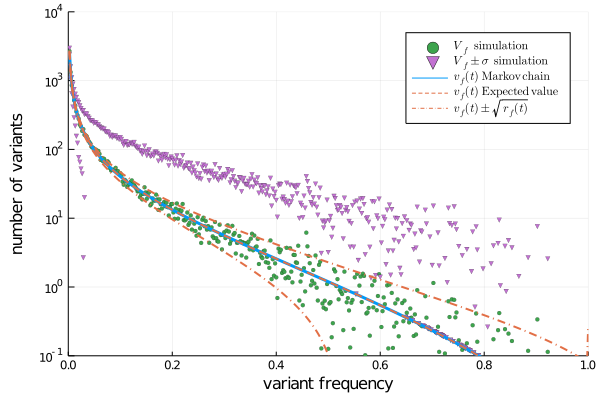

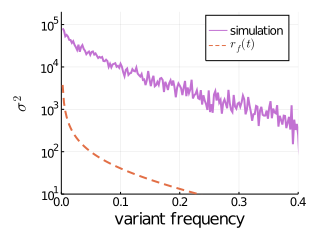

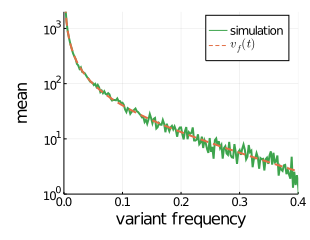

In [10]:
# plotting
p1 = scatter(dfs.freqs_f[2:end], vafSimAv_n[2:end], yaxis=:log10, 
    label=L"V_f \; \; \mathrm{simulation}", 
    markersize=2.3, 
    color=3,
    markershape=:circle,
    markerstrokewidth=0.2)

scatter!(dfs.freqs_f[2:end], dfs.n_f[2:end] .+ sqrt.(vafSimVar_n[2:end]), label=L"V_f \pm \sigma \; \; \mathrm{simulation}", 
    linewidth=1, 
    color=4, 
    markershape=:dtriangle,
    markersize=2.3, 
    markerstrokewidth=0.2)
scatter!(dfs.freqs_f[2:end], dfs.n_f[2:end] .- sqrt.(vafSimVar_n[2:end]), label="", 
    linewidth=1, 
    color=4,
    markershape=:dtriangle,
    markersize=2.3, 
    markerstrokewidth=0.2)

plot!(dfs.freqs_f[2:end], dfs.n_f[2:end], label=L"v_f(t) \;\mathrm{Markov \, chain}", linewidth=3, color=1)

plot!(dfs2.freqs_f[2:end], dfs2.n_f[2:end], label=L"v_f(t)\; \mathrm{Expected \, value}", linewidth=2, linestyle=:dash, color=2)

plot!(dfs.freqs_f[2:end], dfs.n_f[2:end] .+ sqrt.(dfsVar.n_f[2:end]), label=L"v_f(t) \pm \sqrt{r_f(t)}", linewidth=2, linestyle=:dashdot, color=2)
plot!(dfs.freqs_f[2:end], dfs.n_f[2:end] .- sqrt.(dfsVar.n_f[2:end]), label="", linewidth=2, linestyle=:dashdot, color=2)

xlims!((0, 1))
ylims!((10^(-1), 10^4))
xlabel!("variant frequency")
ylabel!("number of variants")
display(p1)

# savefig(p1, "../figures/varEVComparison.pdf")

p3 = plot(dfs.freqs_f[2:end], vafSimVar_n[2:end], yaxis=:log10,
    linewidth=2,
    label="simulation",
    color=4,
    size=(310,240))
plot!(dfs.freqs_f[2:end], dfsVar.n_f[2:end], 
    linewidth=2, 
    color=2,
    linestyle=:dash,
    label=L"r_f(t)")
xlims!((0, 0.4))
ylims!((10^1, 2*10^5))
xlabel!("variant frequency")
ylabel!(L"\sigma^2")
display(p3)

# savefig(p3, "../figures/varianceCompare.pdf")

p4 = plot(dfs.freqs_f[2:end], vafSimAv_n[2:end], yaxis=:log10,
    linewidth=2,
    label="simulation",
    color=3,
    size=(310,240))
plot!(dfs.freqs_f[2:end], dfs.n_f[2:end], 
    linewidth=2,
    linestyle=:dash,
    color=2,
    label=L"v_f(t)")
xlims!((0, 0.4))
ylims!((10^(0), 2*10^3))
xlabel!("variant frequency")
ylabel!("mean")
display(p4)

# savefig(p4, "../figures/evCompare.pdf")
#
# p4 = plot(dfs.freqs_f[2:end], sqrt.(dfsVar.n_f[2:end]), yaxis=:log10, linewidth=2)
# scatter!(dfs.freqs_f[2:end], sqrt.(vafSimAv_n[2:end]))
# xlims!((0, 0.2))
# ylims!((10^0, 2*10^2))
# xlabel!("variant frequency")
# ylabel!("σ on number of variants")
# display(p4)

# savefig("figures/varianceComparison.pdf")

# p4 = plot(dfs2.freqs_f[2:end], dfs2.n_f[2:end], yaxis=:log10, linewidth=2, label="ev")
# plot!(dfs.freqs_f[2:end], dfsVar.n_f[2:end], label="var", linewidth=2)
# xlims!((0, 0.2))
# ylims!((10^1, 2*10^5))
# xlabel!("variant frequency")
# ylabel!("σ^2 on #variants")
# display(p4)

# p2 = scatter(dfs.freqs_f[2:end], vafSimAv_n[2:end], label="simulation average", markersize=2.3, color=3, markerstrokewidth=0.2)
#
# scatter!(dfs.freqs_f[2:end], vafSimAv_n[2:end] .+ sqrt.(vafSimVar_n[2:end]), label="simulation std", linewidth=1, color=4, markersize=2.3, markerstrokewidth=0.2)
# scatter!(dfs.freqs_f[2:end], vafSimAv_n[2:end] .- sqrt.(vafSimVar_n[2:end]), label="", linewidth=1, color=4, markersize=2.3, markerstrokewidth=0.2)
#
# plot!(dfs.freqs_f[2:end], dfs.n_f[2:end], label="Markov Chain evolve", linewidth=3, color=1)
#
# plot!(dfs2.freqs_f[2:end], dfs2.n_f[2:end], label="expected value evolve", linewidth=2, linestyle=:dash, color=2)
#
# plot!(dfs.freqs_f[2:end], dfs.n_f[2:end] .+ sqrt.(dfsVar.n_f[2:end]), label="standard deviation evolve", linewidth=2, linestyle=:dashdot, color=2)
# plot!(dfs.freqs_f[2:end], dfs.n_f[2:end] .- sqrt.(dfsVar.n_f[2:end]), label="", linewidth=2, linestyle=:dashdot, color=2)
#
# xlims!((0, 0.2))
# ylims!((10^2, 2*10^3))
# xlabel!("variant frequency")
# ylabel!("number of variants")
# display(p2)